# Order of Reaction via *Python*
We know that the **rate law** for a reaction can be extressed as...

$$\nu = k\cdot [A]^m[B]^n$$ 

and the exponents are the **order** of reaction for each reactant. We can change the concentrations and observe the instantaneous rate (the rate at that moment when we know the concentration, i.e. the start) of the reaction. We will take our table of **initial concentrations and initial rates** and make a **log/log plot** to determine the **order of reaction** for each reactant.

We will conduct a **series** of experiments where we **change** the concentration of one of the reactants and measure the initial rate. In this case we are examining the results as we change the concentration of reactant A. If we use a high concentration of B, then its concentration will remain almost constant (pseudo first-order conditions). We will use the following **linear relationship**... 

$$\log\nu = m\cdot\log[A] + log(k\cdot[B]^n)$$

where the $k\cdot[B]^n$ term is constant because we made it so. Let us now analyze the data

Take note of the code below. Alter it accordingly to work with your own data. 

In [1]:
import pandas as pd                # Load up all the tools we need
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = [
        [0.010, 0.045],                                  # Enter your own data in this list of lists 
        [0.018, 0.146],
        [0.025, 0.281],
        [0.032, 0.461],
        [0.051, 1.17]
       ]                                                   
results = pd.DataFrame(data, columns = ["[A]","rate"])   # make the dataframe object

print(results)                                           # display the dataframe

     [A]   rate
0  0.010  0.045
1  0.018  0.146
2  0.025  0.281
3  0.032  0.461
4  0.051  1.170


In [3]:
results["log[A]"] = np.log10(results["[A]"])              # perform the calculations
results["log(rate)"] = np.log10(results["rate"])
print(results)

     [A]   rate    log[A]  log(rate)
0  0.010  0.045 -2.000000  -1.346787
1  0.018  0.146 -1.744727  -0.835647
2  0.025  0.281 -1.602060  -0.551294
3  0.032  0.461 -1.494850  -0.336299
4  0.051  1.170 -1.292430   0.068186


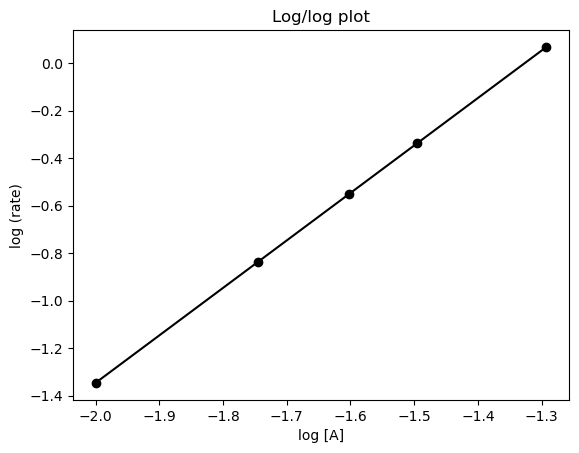

Slope = 2.00 +/- 0.0016
Intercept = 2.65 +/- 0.0026
R = 1.000


In [4]:
y, x = results["log(rate)"],results["log[A]"]

fit = stats.linregress(x, y)      # linear regression data fit
m = fit.slope
b = fit.intercept
y_calc = m * x + b                # y-axis calculated from fit parameters

plt.plot(x, y, "ko")              # plot data
plt.plot(x, y_calc, "k-")         # plot line fit

plt.xlabel("log [A]")               
plt.ylabel("log (rate)")
plt.title("Log/log plot")          
plt.show()  

print("Slope = {:.2f} +/- {:.4f}".format(m, 2*fit.stderr))          
print("Intercept = {:.2f} +/- {:.4f}".format(b, 2*fit.intercept_stderr))   
print("R = {:.3f}".format(fit.rvalue))

## Summary
The **slope** is the **order of reaction** w.r.t. the reactant whose concentration is being changed in each rate experiment. The **plot** should be a straight line. If it is not, then the order of reaction is changing as the concentration changes (this is actually possible in multistep reactions).

### Challenge
**Rewrite** the code above so that the data is read in from a text **file** instead of being entered directly.